In [35]:
import numpy as np
import matplotlib.pyplot as plt
import data
import data_true

In [36]:
data = np.array(data.values)
print(data.shape)

data_true = np.array(data_true.values)
print(data_true.shape)

(51, 51)
(51, 51)


In [37]:
print(data.T[32])

[ 80.        75.84689   71.721792  67.65221   63.664637  59.784078
  56.033602  52.433937  49.003137  45.756309  42.705446  39.859335
  37.223572  34.80067   32.590247  30.58929   28.79248   27.192553
  25.78069   24.546916  23.480486  22.570253  21.805     21.17373
  20.665906  20.271634  19.981795  19.788114  19.683184  19.660435
  19.714062  19.838921  20.03039   20.284227  20.596407  20.962975
  21.379911  21.843027  22.347898  22.889845  23.463965  24.065221
  24.688574  25.329157  25.982464  26.64454   27.312131  27.98278
  28.654837  29.327372  30.      ]


In [38]:
def plot(data, grid):
    plt.plot(grid[::-1], data[16], label="Срез в x=0.16")
    # на графике из условия перепутаны оси
    plt.plot(grid[::-1], data[32], label="Срез в x=0.32")
    plt.plot(grid, data.T[16], label="Срез в y=0.16")
    # Только в срезе по x
    plt.plot(grid, data.T[32], label="Срез в y=0.32")

    plt.scatter(grid[::-1], data[16], marker="s") 
    # на графике из условия перепутаны оси
    plt.scatter(grid[::-1], data[32], marker="o")
    plt.scatter(grid, data.T[16], marker="+")
    # Только в срезе по x
    plt.scatter(grid, data.T[32], marker="*")

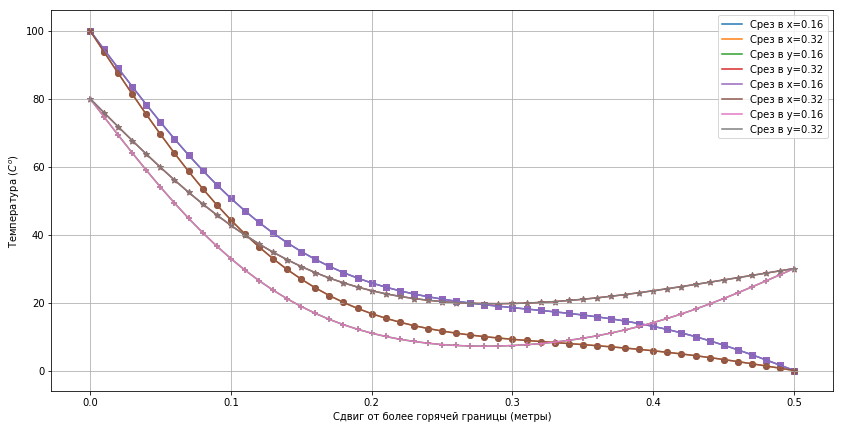

In [39]:
plt.figure(figsize=(14, 7))
grid = np.arange(data.shape[0]) / 100
plot(data, grid)
plot(data_true, grid)  # проверенный график, вычисленный на одном процессе
plt.ylabel("Температура ($C^o$)")
plt.xlabel("Сдвиг от более горячей границы (метры)")
plt.legend()
plt.grid()
plt.savefig('temperature_plot.png', format='png', dpi=300)
plt.show()

_____________________
Ускорение и эффективность

In [40]:
times_on = []
fname_preffix = "time_on_"
fname_suffix = ".txt"
for i in range(1, 13):
    fname = (
        fname_preffix + str(i // 10 + int("0")) +
        str(i % 10 + int("0")) + fname_suffix
    )
    times = []
    with open(fname, "rt") as f:
        for line in f:
            times.append(float(line))
    times.sort()
    times_on.append(times)

times_on = np.array(times_on)
print(times_on)

[[ 0.02728796  0.02752304  0.02755404  0.02763987  0.02771902]
 [ 0.01634717  0.01640296  0.01659203  0.01659393  0.01700187]
 [ 0.01387     0.01390004  0.01392293  0.0139668   0.01405883]
 [ 0.01170707  0.01196599  0.01216698  0.01243901  0.01256609]
 [ 0.01035714  0.01053906  0.01067305  0.01069283  0.01081705]
 [ 0.009974    0.00997996  0.01006222  0.01013517  0.01027608]
 [ 0.0094378   0.00969815  0.00977993  0.00991702  0.0100739 ]
 [ 0.00857496  0.00922608  0.00925517  0.00945592  1.93642187]
 [ 0.00880003  0.00897503  0.00906301  0.00934291  0.00998497]
 [ 0.00828218  0.00830102  0.00831819  0.008358    0.00858998]
 [ 0.00825596  0.00846004  0.00848317  0.00872493  0.00889611]
 [ 0.0081768   0.0084579   0.00849199  0.00850201  0.00876308]]


In [41]:
measured_vals = times_on[:, 1:4].mean(axis=1)
print(measured_vals)

[ 0.02757231  0.01652964  0.01392992  0.01219066  0.01063498  0.01005912
  0.00979837  0.00931239  0.00912698  0.00832574  0.00855605  0.00848397]


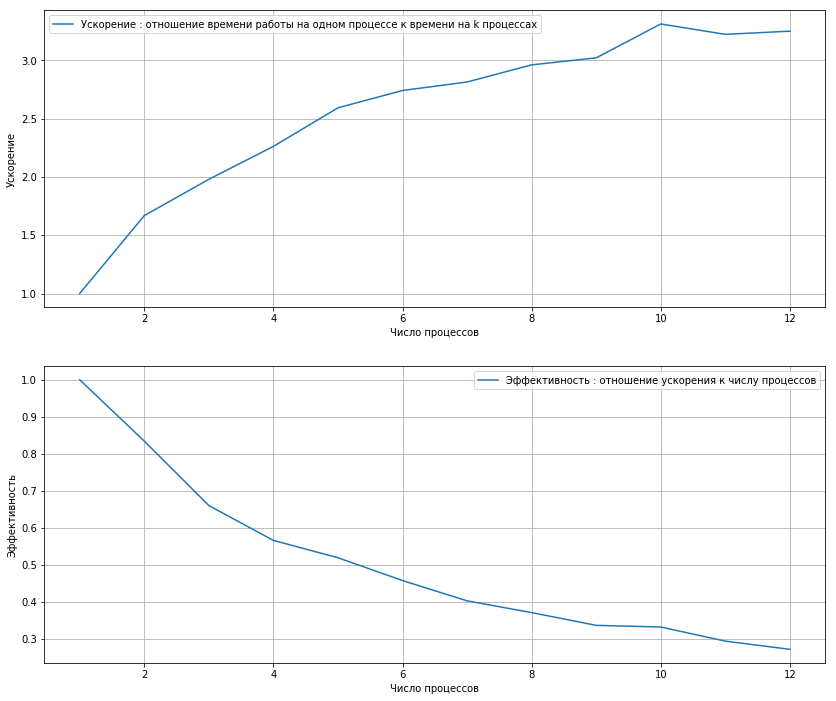

In [42]:
plt.figure(figsize=(14, 12))
plt.subplot(211)
plt.plot(np.arange(1, 13), measured_vals[0] / measured_vals,
         label="Ускорение : отношение времени работы на" + 
         " одном процессе к времени на k процессах")
plt.xlabel("Число процессов")
plt.ylabel("Ускорение")
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(np.arange(1, 13), (measured_vals[0] / measured_vals) / np.arange(1, 13),
         label="Эффективность : отношение ускорения к числу процессов")
plt.xlabel("Число процессов")
plt.ylabel("Эффективность")
plt.legend()
plt.grid()
plt.savefig('acceleration_and_efficiency.png', format='png', dpi=300)
plt.show()